In [4]:
# Welcome to your new notebook
# Type here in the cell editor to add code!
%pip install ultralytics

StatementMeta(, 5acb7b18-49be-403a-82e0-6169c19dafac, 11, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.3/716.3 kB 16.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 56.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 159.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 6.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 111.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 161.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 140.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 6.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 12.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 41.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 64.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━

In [5]:
%pip install opencv-python-headless imutils

StatementMeta(, , -1, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 74.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... - done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25837 sha256=96025cbbb5280edb7a3555182be6bc4e42bd6da1c98328da3f0d043f1c37b214
  Stored in directory: /home/trusted-service-user/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



In [6]:
import ultralytics
import cv2

StatementMeta(, 5acb7b18-49be-403a-82e0-6169c19dafac, 19, Finished, Available)

In [16]:
import ultralytics
import cv2
from PIL import Image
from IPython.display import display
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator

def load_model(weights):
    model = YOLO(weights)
    return model

def resize_frame(frame, threshold):
    if frame.shape[0] < threshold:
        return frame
    else:
        scale = frame.shape[0] / threshold
        new_height = int(frame.shape[0] / scale)
        new_width = int(frame.shape[1] / scale)
        dim = (new_width, new_height)

        new_frame = cv2.resize(frame, dim, interpolation=cv2.INTER_CUBIC)

        return new_frame
    
def show_frame(frame):
    img = Image.fromarray(frame)
    display(img)

def yolo(weights, img_path):
    img = cv2.imread(img_path)
    
    model = load_model(weights)
    
    instances = model(img)

    for r in instances:
        annotator = Annotator(img)
        
        boxes = r.boxes
        for box in boxes:
            
            b = box.xyxy[0]  # get box coordinates in (top, left, bottom, right) format
            c = box.cls
            annotator.box_label(b, model.names[int(c)])
          
    frame = annotator.result()

    size_threshold = 400
    frame = resize_frame(frame, size_threshold)
    show_frame(frame)

StatementMeta(, 5acb7b18-49be-403a-82e0-6169c19dafac, 29, Finished, Available)

StatementMeta(, 5acb7b18-49be-403a-82e0-6169c19dafac, 34, Finished, Available)


0: 544x640 2 Atopic Dermatitiss, 90.7ms
Speed: 1.7ms preprocess, 90.7ms inference, 0.5ms postprocess per image at shape (1, 3, 544, 640)


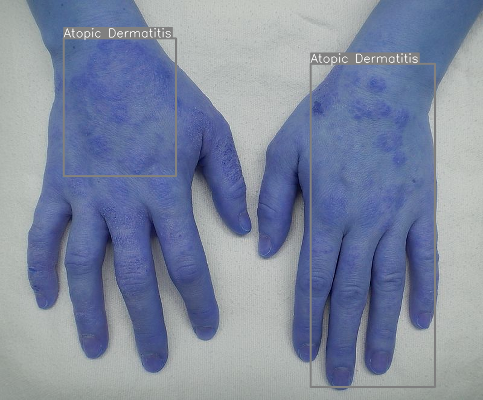

In [21]:
import cv2
path_to_lake = "/lakehouse/default/Files/"
model = path_to_lake + "runs/train/yolo_dermatitis.pt"
img = path_to_lake + "inference/atopic2.jpg"
yolo(model, img)